# Modelling

We will take the Housing dataset which contains information about different
houses in Boston. There are 506 samples and 13 feature variables in this dataset
.The objective is to predict the value of prices of the house using the given
features.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = load_boston()
print(type(dataset))
print(dataset.keys())
print(dataset.DESCR)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to

In [3]:
dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
print(dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
type(dataset.data)

numpy.ndarray

In [6]:
independant_variables = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
full_df = independant_variables.copy()
full_df['target'] = dataset.target

In [8]:
full_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis

We will use some visualizations to understand the relationship of the target 
variable with other features.

C:\Users\NITESHKUMAR G\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


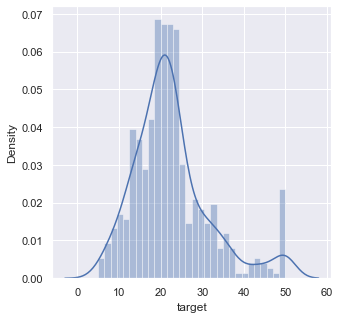

In [9]:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(full_df['target'],bins=30)
plt.show()

# The target is normally distributed with a few outliers

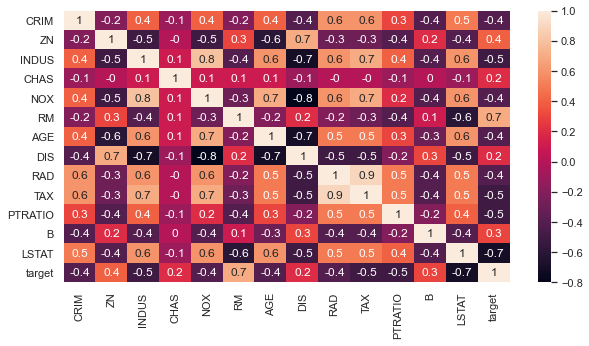

In [10]:
# to check multicollinearity 
correlation_matrix = full_df.corr().round(1)
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(data=correlation_matrix, annot=True, xticklabels=full_df.columns, yticklabels=full_df.columns)
plt.show()

# The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation

In [11]:
train_x,test_x, train_y,test_y = train_test_split(independant_variables,dataset.target)
print(independant_variables.shape)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


# modelling
linear_regression = LinearRegression()
model = linear_regression.fit(train_x, train_y)

(506, 13)
(379, 13)
(379,)
(127, 13)
(127,)


In [12]:
preds = model.predict(test_x)
print(preds[:10])
mse = mean_squared_error(test_y, preds)
print("MSE: " + str(mse))
print("RMSE: ", math.sqrt(mse))

[24.97349086 32.28186416 20.22168064 21.68103448  9.26206381 44.72463873
 21.05808129 20.74994315 18.55767291 14.6290783 ]
MSE: 19.57736739491407
RMSE:  4.424631893718852


In [13]:
print(preds[:10])
print(test_y[:10])

[24.97349086 32.28186416 20.22168064 21.68103448  9.26206381 44.72463873
 21.05808129 20.74994315 18.55767291 14.6290783 ]
[23.1 31.6 17.7 20.7 23.7 50.  21.8 21.8 14.5 18.2]
